# Data Manipulation

This notebook will load in a dataset and perform some basic and intermediate manipulations on it to showcase what's possible.

### Imports

First let's load in some packages.

In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', None)

## Load data

Let's load in some data into a dataframe.

In [3]:
df = pd.read_csv('../datasets/owid.csv')

In [4]:
df['date'] = df['date'].apply(pd.to_datetime)
df.set_index('date', inplace=True)

## Show me what you got...

<img src="https://media.tenor.com/images/8b6a3ae4dfb907d7b5587b10c3cf397b/tenor.png" height="400">

In [5]:
df

,Unnamed: 0,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,0,AFG,Asia,Afghanistan,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-25,1,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-26,2,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-27,3,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2020-02-28,4,AFG,Asia,Afghanistan,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-07,74190,ZWE,Africa,Zimbabwe,36271.0,11.0,26.000,1485.0,0.0,3.143,2440.367,0.740,1.749,99.913,0.000,0.211,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32240.0,32240.0,NaN,226.0,1914.0,0.22,0.22,NaN,129.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
2021-03-08,74191,ZWE,Africa,Zimbabwe,36289.0,18.0,24.857,1487.0,2.0,2.714,2441.578,1.211,1.672,100.048,0.135,0.183,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35518.0,35518.0,NaN,3278.0,2009.0,0.24,0.24,NaN,135.0,35.19,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
2021-03-09,74192,ZWE,Africa,Zimbabwe,36321.0,32.0,24.714,1489.0,2.0,2.429,2443.731,2.153,1.663,100.182,0.135,0.163,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35761.0,35761.0,NaN,243.0,1526.0,0.24,0.24,NaN,103.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [6]:
df.describe()

,Unnamed: 0,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,74195.000000,7.312200e+04,73120.000000,72119.000000,6.392300e+04,64081.000000,72119.000000,72723.000000,72721.000000,71725.000000,63537.000000,63695.000000,71725.000000,59660.000000,7639.000000,7639.000000,9185.000000,9185.000000,645.000000,645.000000,1229.000000,1229.000000,3.363600e+04,3.341200e+04,33412.000000,33636.000000,3.827500e+04,38275.000000,37033.000000,36455.000000,3.629000e+03,3.214000e+03,2.142000e+03,3.062000e+03,5.453000e+03,3629.000000,3214.000000,2142.000000,5453.000000,63527.000000,7.378700e+04,69322.000000,67395.000000,66619.000000,67015.000000,67600.000000,46150.000000,68246.000000,69111.000000,53645.000000,52908.000000,34257.000000,62464.000000,70503.000000,68192.000000
mean,37097.000000,6.449518e+05,5155.187732,5168.936677,1.914841e+04,132.012547,116.097237,7640.600834,66.489319,66.363371,180.171155,1.395186,1.223487,1.015822,994.681896,22.767916,4593.413283,152.453856,250.520778,18.316567,3660.527709,104.854852,3.772129e+04,4.577096e+06,165.248376,1.499435,3.621063e+04,1.433330,0.087893,161.824672,4.850055e+06,3.536176e+06,1.580746e+06,1.988407e+05,1.201789e+05,7.409859,5.489334,2.906825,2397.955988,58.862873,1.311189e+08,327.983746,30.557929,8.799937,5.577541,19119.034141,13.279460,257.212307,7.796606,10.549461,32.648504,51.005708,3.036092,73.137083,0.727865
std,21418.395948,4.536825e+06,32269.575403,31991.981635,1.119959e+05,723.226466,660.516750,15056.931343,168.249306,141.378731,320.937035,3.872463,2.784837,0.349293,3105.659798,25.485786,12754.467527,189.762842,515.013730,32.746507,11579.757940,223.149422,1.471427e+05,2.136520e+07,342.458527,4.133258,1.352448e+05,3.283498,0.099694,868.093360,2.370319e+07,1.506951e+07,6.370966e+06,8.459570e+05,5.691195e+05,15.144815,10.042559,6.575664,4364.706572,22.032249,6.982110e+08,1591.907571,9.118447,6.241735,4.262908,19683.362627,19.921914,118.454782,3.939224,10.409967,13.466449,31.767998,2.467479,7.550021,0.150147
min,0.000000,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,1.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,18548.500000,7.210000e+02,2.000000,5.857000,3.700000e+01,0.000000,0.000000,147.036000,0.137000,1.001000,5.678000,0.000000,0.000000,0.870000,20.000000,3.139000,82.000000,17.582000,7.823000,1.356000,40.669000,7.874000,1.284000e+03,9.917600e+04,8.338250,0.103750,1.332000e+03,0.103000,0.015000,7.900000,3.368300e+04,3.274900e+04,1.784700e+04,2.399250e+03,1.121000e+03,0.

## Filtering

Let's filter down the dataframe

In [7]:
fdf = df[['new_cases', 'location']]

In [8]:
fdf

,new_cases,location
date,,
2020-02-24,1.0,Afghanistan
2020-02-25,0.0,Afghanistan
2020-02-26,0.0,Afghanistan
2020-02-27,0.0,Afghanistan
2020-02-28,0.0,Afghanistan
...,...,...
2021-03-07,11.0,Zimbabwe
2021-03-08,18.0,Zimbabwe
2021-03-09,32.0,Zimbabwe


In [9]:
ffdf = fdf[fdf["location"].isin(["Netherlands", "Belgium", "Germany"])]

In [10]:
ffdf

,new_cases,location
date,,
2020-02-04,1.0,Belgium
2020-02-05,0.0,Belgium
2020-02-06,0.0,Belgium
2020-02-07,0.0,Belgium
2020-02-08,0.0,Belgium
...,...,...
2021-03-07,4564.0,Netherlands
2021-03-08,3844.0,Netherlands
2021-03-09,4379.0,Netherlands


<AxesSubplot:xlabel='date', ylabel='new_cases'>

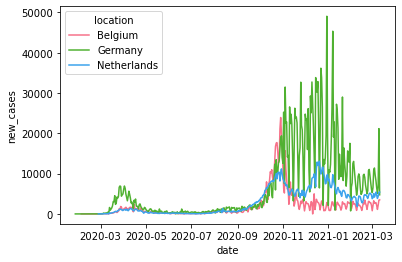

In [11]:
sns.lineplot(data=ffdf, x='date', y='new_cases', hue="location", palette='husl')